# MOBILE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [6]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
train.shape

(2000, 21)

In [8]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
train.duplicated().any()

False

In [10]:
train['blue'].unique()

array([0, 1], dtype=int64)

In [11]:
train['battery_power'].unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858], dtype=int64)

In [12]:
train['clock_speed'].unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [13]:
train['dual_sim'].unique()

array([0, 1], dtype=int64)

In [14]:
train['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

In [15]:
train['four_g'].unique()

array([0, 1], dtype=int64)

In [16]:
train['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

In [17]:
train['mobile_wt'].unique()

array([188, 136, 145, 131, 141, 164, 139, 187, 174,  93, 182, 177, 159,
       198, 185, 196, 121, 101,  81, 156, 199, 114, 111, 132, 143,  96,
       200,  88, 150, 107, 100, 157, 160, 119,  87, 152, 166, 110, 118,
       162, 127, 109, 102, 104, 148, 180, 128, 134, 144, 168, 155, 165,
        80, 138, 142,  90, 197, 172, 116,  85, 163, 178, 171, 103,  83,
       140, 194, 146, 192, 106, 135, 153,  89,  82, 130, 189, 181,  99,
       184, 195, 108, 133, 179, 147, 137, 190, 176,  84,  97, 124, 183,
       113,  92,  95, 151, 117,  94, 173, 105, 115,  91, 112, 123, 129,
       154, 191, 175,  86,  98, 125, 126, 158, 170, 161, 193, 169, 120,
       149, 186, 122, 167], dtype=int64)

In [18]:
train['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7], dtype=int64)

In [19]:
train['pc'].unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12], dtype=int64)

In [20]:
train['px_height'].unique()

array([  20,  905, 1263, ...,  528,  915,  483], dtype=int64)

In [21]:
train['px_width'].unique()

array([ 756, 1988, 1716, ...,  743, 1890, 1632], dtype=int64)

In [22]:
train['ram'].unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919], dtype=int64)

In [23]:
train['sc_h'].unique()

array([ 9, 17, 11, 16,  8, 13, 19,  5, 14, 18,  7, 10, 12,  6, 15],
      dtype=int64)

In [24]:
train['sc_w'].unique()

array([ 7,  3,  2,  8,  1, 10,  9,  0, 15, 13,  5, 11,  4, 12,  6, 17, 14,
       16, 18], dtype=int64)

In [25]:
train['talk_time'].unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8], dtype=int64)

In [26]:
train['three_g'].unique()

array([0, 1], dtype=int64)

In [27]:
train['touch_screen'].unique()

array([0, 1], dtype=int64)

In [28]:
train['wifi'].unique()

array([1, 0], dtype=int64)

In [29]:
train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

The precentage of 0 class is : 0.25
The precentage of 1 class is: 0.25
The precentage of 2 class is: 0.25
The precentage of 3 class is: 0.25


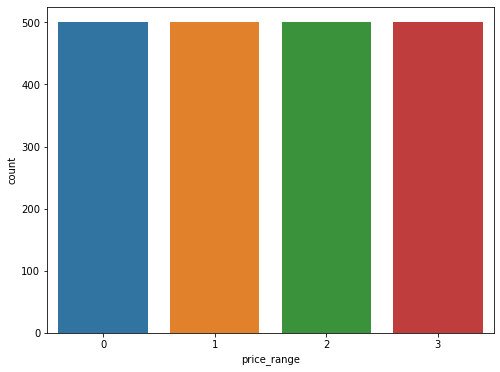

In [30]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train['price_range'])
print('The precentage of 0 class is : %.2f' % (train['price_range'].value_counts()[0]/len(train)))
print('The precentage of 1 class is: %.2f' % (train['price_range'].value_counts()[1]/len(train)))
print('The precentage of 2 class is: %.2f' % (train['price_range'].value_counts()[2]/len(train)))
print('The precentage of 3 class is: %.2f' % (train['price_range'].value_counts()[3]/len(train)))
         

In [31]:
len(train[train['price_range'] == 0])

500

In [32]:
train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

The precentage of 0 class is : 0.49
The precentage of 1 class is: 0.51


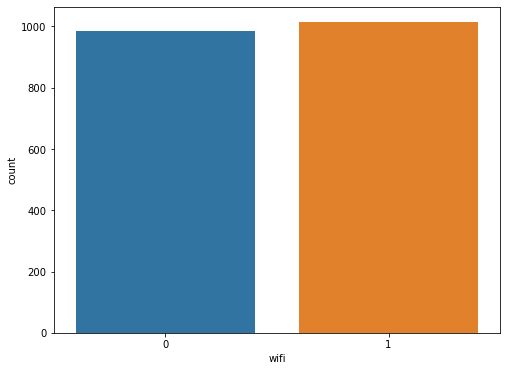

In [33]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train['wifi'])
print('The precentage of 0 class is : %.2f' % (train['wifi'].value_counts()[0]/len(train)))
print('The precentage of 1 class is: %.2f' % (train['wifi'].value_counts()[1]/len(train)))


The precentage of 0 class is : 0.51
The precentage of 1 class is: 0.49


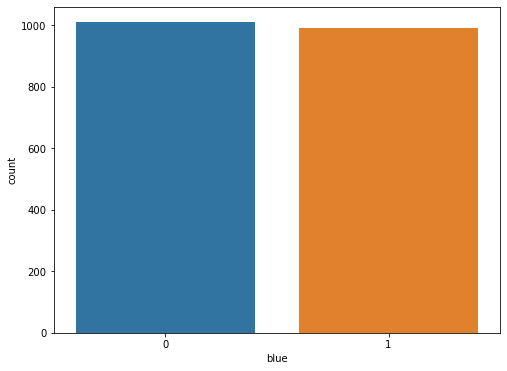

In [34]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train['blue'])
print('The precentage of 0 class is : %.2f' % (train['blue'].value_counts()[0]/len(train)))
print('The precentage of 1 class is: %.2f' % (train['blue'].value_counts()[1]/len(train)))


The precentage of 0 class is : 0.49
The precentage of 1 class is: 0.51


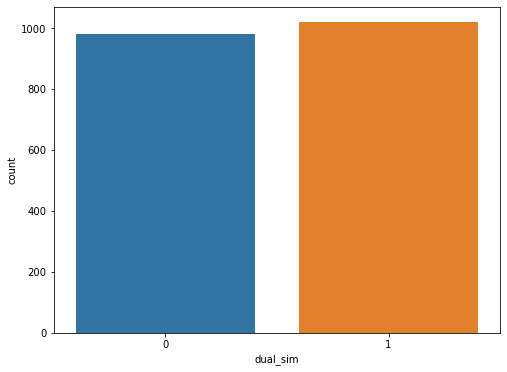

In [35]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train['dual_sim'])
print('The precentage of 0 class is : %.2f' % (train['dual_sim'].value_counts()[0]/len(train)))
print('The precentage of 1 class is: %.2f' % (train['dual_sim'].value_counts()[1]/len(train)))


The precentage of 0 class is : 0.48
The precentage of 1 class is: 0.52


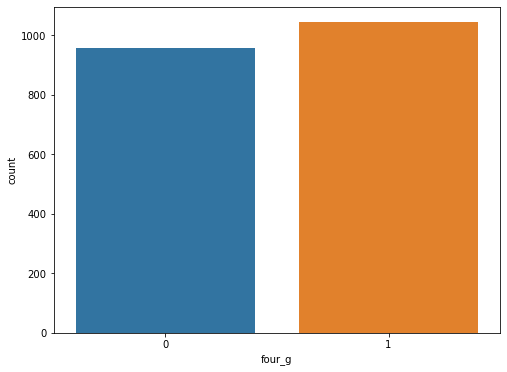

In [36]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train['four_g'])
print('The precentage of 0 class is : %.2f' % (train['four_g'].value_counts()[0]/len(train)))
print('The precentage of 1 class is: %.2f' % (train['four_g'].value_counts()[1]/len(train)))


The precentage of 0 class is : 0.24
The precentage of 1 class is: 0.76


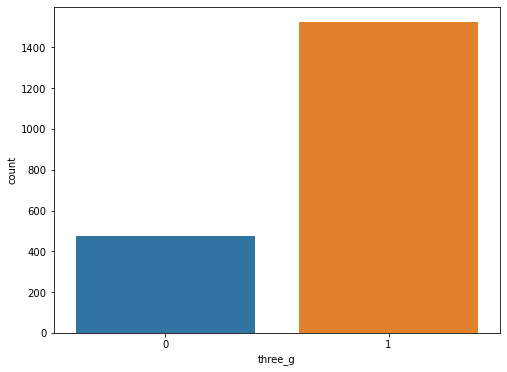

In [37]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train['three_g'])
print('The precentage of 0 class is : %.2f' % (train['three_g'].value_counts()[0]/len(train)))
print('The precentage of 1 class is: %.2f' % (train['three_g'].value_counts()[1]/len(train)))


The precentage of 0 class is : 0.50
The precentage of 1 class is: 0.50


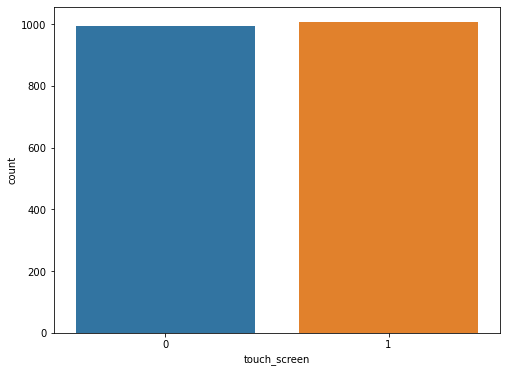

In [38]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(train['touch_screen'])
print('The precentage of 0 class is : %.2f' % (train['touch_screen'].value_counts()[0]/len(train)))
print('The precentage of 1 class is: %.2f' % (train['touch_screen'].value_counts()[1]/len(train)))


<AxesSubplot:>

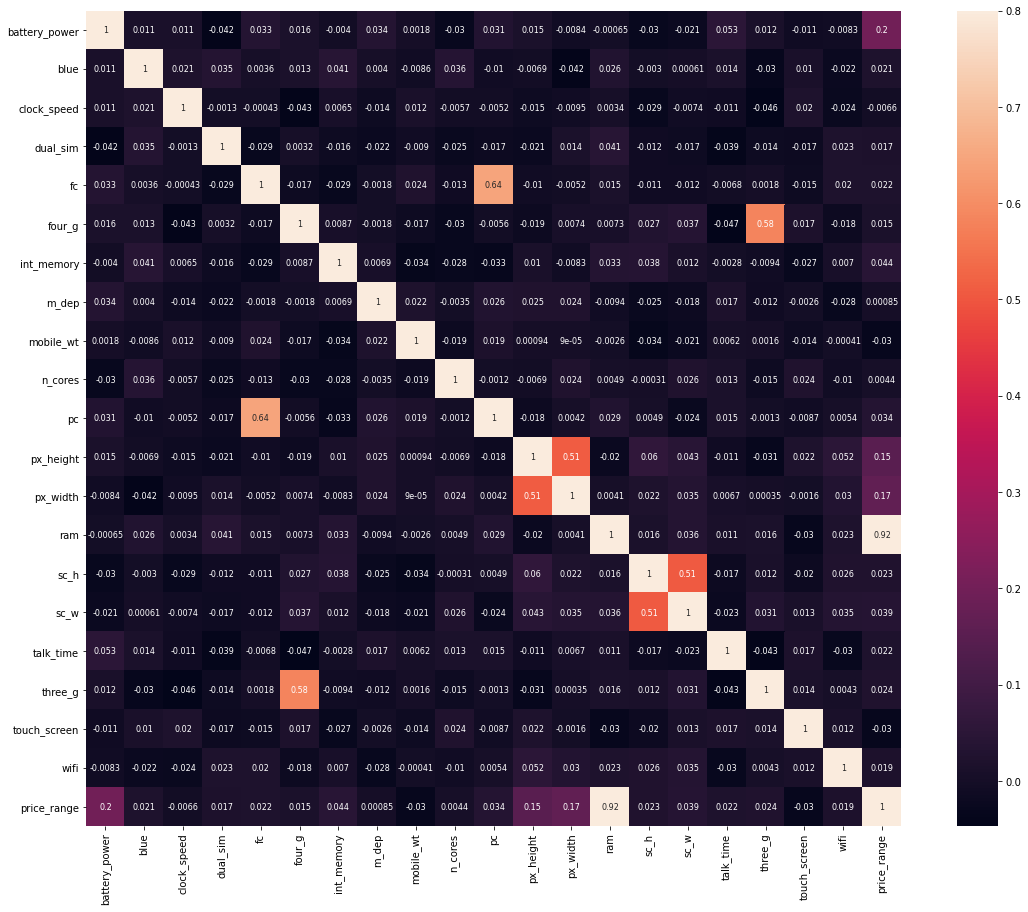

In [39]:
corrmat = train.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

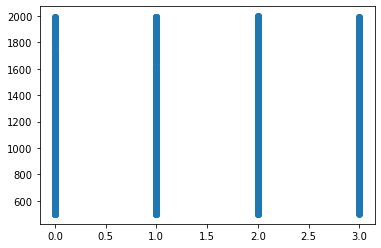

In [40]:
plt.scatter(train['price_range'], train['battery_power']);

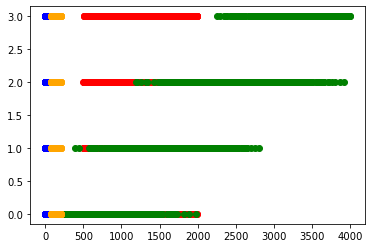

In [41]:
, ax = plt.subplots(figsize=(10,4))
plt.scatter(y=train['price_range'],x=train['battery_power'],color='red')
plt.scatter(y=train['price_range'],x=train['ram'],color='Green')
plt.scatter(y=train['price_range'],x=train['n_cores'],color='blue')
plt.scatter(y=train['price_range'],x=train['mobile_wt'],color='orange')

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y = np.array(train['price_range'])
X = train
X = X.drop(['price_range'],axis=1)
X = np.array(X)

print('shape of X: '+str(X.shape))
print('shape of y: '+str(y.shape))

shape of X: (2000, 20)
shape of y: (2000,)


In [43]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


## “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges

### SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. ... These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.

In [49]:
from sklearn import metrics
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_test,y_pred))

Accuracy Score:
0.96


In [50]:
svc=SVC(kernel='rbf')
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_test,y_pred))

Accuracy Score:
0.8875


c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_test,y_pred))

Accuracy Score:
0.4975


c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# K-Folds Cross Validation:

## It ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data. ... Repeat this process until every K-fold serve as the test set.

In [54]:
from sklearn. model_selection import cross_val_score 
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.94  0.95  0.945 0.955 0.96  0.965 0.94  0.965 0.94  0.955]


In [55]:
print(scores.mean())

0.9514999999999999


In [56]:
from sklearn. model_selection import cross_val_score 
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of

[0.9   0.945 0.895 0.91  0.93  0.915 0.895 0.88  0.87  0.905]
0.9045


c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [57]:
from sklearn. model_selection import cross_val_score 
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of

[0.525 0.53  0.535 0.49  0.475 0.495 0.535 0.49  0.525 0.52 ]
0.5120000000000001


c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### When K-fold cross validation is done we can see different score in each iteration.This happens because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.

### With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.

# C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data.

In [61]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [62]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))

The Cross Validation Score :[0.95015576 0.96261682 0.94392523 0.92789969 0.97169811]
The Average Cross Validation Score :0.9512591238085129
The Stratified Cross Validation Score :[0.97819315 0.92834891 0.93457944 0.97805643 0.96226415]
The Average Stratified Cross Validation Score :0.9562884145205576


In [89]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [91]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 7, 10, 15, 25, 50],
                         'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.91.


In [93]:
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

c:\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.95 is the accuracy of the SV Regressor


In [96]:
test = test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_mat = np.array(test)
test = scaler.fit_transform(test_mat)


In [98]:
clf4 = SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,Y_train)
prediction = clf4.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,2
1,2
2,2
3,2
4,2


In [100]:

prediction = svc.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head(15)

,0
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3
